# Lab: Logistic Regression, LDA, QDA, and KNN

# 4.6.1 The Stock Market Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import neighbors, linear_model, preprocessing

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import datasets 

In [2]:
# Read CSV file python
df = pd.read_csv('Dataset/Smarket.csv',usecols=range(0,10), index_col=0, parse_dates=True)
df.head(5)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [3]:
df.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


C:\Users\ida_s\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ida_s\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


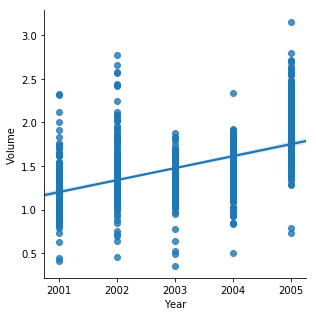

In [4]:
sns.lmplot("Year", "Volume", data=df, size=4.5)
#sns.boxplot("Year","Volume",data=df)
# https://towardsdatascience.com/a-guide-to-pandas-and-matplotlib-for-data-exploration-56fad95f951c

# 4.6.2 Logistic Regression

Again the Smarket data is used

In [5]:
model = sm.formula.glm('Direction ~ Lag1+Lag2+Lag3+Lag4+Lag5+Volume', family=sm.families.Binomial(), data=df).fit()

In [6]:
print(model.summary())

                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1250
Model:                                              GLM   Df Residuals:                     1243
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -863.79
Date:                                  Sat, 27 Apr 2019   Deviance:                       1727.6
Time:                                          22:45:51   Pearson chi2:                 1.25e+03
No. Iterations:                                       4   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------

In [7]:
pred = model.predict()
print(pred)

[0.49291587 0.51853212 0.51886117 ... 0.4607317  0.47388171 0.48208344]


In [8]:
#Splitting in train and test set
df_train = df[df.Year < 2005]
df_test = df[df.Year == 2005]
df_X_train = df_train[:][['Lag1', 'Lag2']]
df_X_test = df_test[:][['Lag1', 'Lag2']]
df_y_train = df_train[:]['Direction']
df_y_test = df_test[:]['Direction']

# Fitting the model based on train set
lr = linear_model.LogisticRegression()
ex = lr.fit(df_X_train, df_y_train)

# Print
print('\nData set is splitted into two - before 2004 and after 2004\nBefore 2004 is used as training set and after 2004 is test.')
print('\nScore of test data')
print(lr.score(df_X_test, df_y_test))

# Confusion matrix
print('\n',pd.crosstab(df_y_test, lr.predict(df_X_test), rownames=['True'], colnames=['Predicted'], margins=True))



Data set is splitted into two - before 2004 and after 2004
Before 2004 is used as training set and after 2004 is test.

Score of test data
0.5595238095238095

 Predicted  Down   Up  All
True                     
Down         35   76  111
Up           35  106  141
All          70  182  252


C:\Users\ida_s\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# 4.6.3 Linear Discriminant Analysis

Again the Smarket data set is being used for this exercise

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [10]:
df = pd.read_csv('Dataset/Smarket.csv',usecols=range(1,10), index_col=0, parse_dates=True)

In [11]:
X_train = df[:'2004'][['Lag1','Lag2']]
y_train = df[:'2004']['Direction']

X_test = df['2005':][['Lag1','Lag2']]
y_test = df['2005':]['Direction']

lda = LinearDiscriminantAnalysis()
pred = lda.fit(X_train, y_train).predict(X_test)


In [12]:
# pi_hat1 and pi_hat2
priors = lda.priors_
print('Prior probabilities of Groups:\n', priors)
# in other words, 49.2% of the training observations correspond to days during which the market went down.

Prior probabilities of Groups:
 [0.49198397 0.50801603]


In [13]:
m = lda.means_
print('Group mean:\n',m)

Group mean:
 [[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]


In [14]:
# These do not seem to correspond to the values from the R output in the book?
coef = lda.scalings_
print('LD coefficients:\n',coef)

LD coefficients:
 [[-0.64201904]
 [-0.51352928]]


In [15]:
# LDA prediction 
cmatrix = confusion_matrix(y_test, pred).T
print('Confusion matrix:\n',cmatrix)

Confusion matrix:
 [[ 35  35]
 [ 76 106]]


In [16]:
print(classification_report(y_test, pred, digits=3))

              precision    recall  f1-score   support

        Down      0.500     0.315     0.387       111
          Up      0.582     0.752     0.656       141

   micro avg      0.560     0.560     0.560       252
   macro avg      0.541     0.534     0.522       252
weighted avg      0.546     0.560     0.538       252



In [17]:
# 50% threshold: allows us to recreate the predictions
pred_p = lda.predict_proba(X_test)

np.unique(pred_p[:,1]>0.5, return_counts=True)

#Notice that the posterior probability output by the model corresponds to the probability that the market will decrease

(array([False,  True]), array([ 70, 182], dtype=int64))

In [18]:
# 90% threshold
np.unique(pred_p[:,1]>0.9, return_counts=True)

# No days in 2005 meet that threshold! In fact, the greatest posterior probability of decrease in all of 2005 was 52.02%.

(array([False]), array([252], dtype=int64))

# 4.6.4 Quadratic Discriminant Analysis

In [19]:
qda = QuadraticDiscriminantAnalysis()
# QDA: The output contains the group means. But it does not contain the coefficients of the linear discriminants, because the QDA classifier involves a quadratic, rather than a linear, function of the predictors
# Predict works as usually
pred = qda.fit(X_train, y_train).predict(X_test)
#print(pred)

In [20]:
p = qda.priors_
print('Prior probabilities of Groups:\n', p)

Prior probabilities of Groups:
 [0.49198397 0.50801603]


In [21]:
m = qda.means_
print('Group means:\n',m)

Group means:
 [[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]


In [22]:
# This table gives the prediction for 2005 in the confusion matrix
cm = confusion_matrix(y_test, pred).T
print('Confusion matrix:\n',cm)

Confusion matrix:
 [[ 30  20]
 [ 81 121]]


In [23]:
print(classification_report(y_test, pred, digits=3))
# Se nederste: dette er den vægtede gennemsnit: mean

              precision    recall  f1-score   support

        Down      0.600     0.270     0.373       111
          Up      0.599     0.858     0.706       141

   micro avg      0.599     0.599     0.599       252
   macro avg      0.600     0.564     0.539       252
weighted avg      0.599     0.599     0.559       252



# 4.6.5 K-Nearest Neighbors

In [24]:
# K = 1
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
pred = knn.fit(X_train, y_train).predict(X_test)
print('Confusion matrix:\n',confusion_matrix(y_test, pred).T)
print('\nClassification Report:\n', classification_report(y_test, pred, digits=3))
# K = 1 are not very good, since only 50% of the observations are correctly predicted

Confusion matrix:
 [[43 58]
 [68 83]]

Classification Report:
               precision    recall  f1-score   support

        Down      0.426     0.387     0.406       111
          Up      0.550     0.589     0.568       141

   micro avg      0.500     0.500     0.500       252
   macro avg      0.488     0.488     0.487       252
weighted avg      0.495     0.500     0.497       252



In [25]:
# K = 3
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
pred = knn.fit(X_train, y_train).predict(X_test)
print('Confusion matrix:\n',confusion_matrix(y_test, pred).T)
print('\nClassification Report:\n', classification_report(y_test, pred, digits=3))

Confusion matrix:
 [[48 55]
 [63 86]]

Classification Report:
               precision    recall  f1-score   support

        Down      0.466     0.432     0.449       111
          Up      0.577     0.610     0.593       141

   micro avg      0.532     0.532     0.532       252
   macro avg      0.522     0.521     0.521       252
weighted avg      0.528     0.532     0.529       252



The results have improved slightly. But increasing K further turns out to provide no further improvements. 
It appears that for this data, QDA provides the best results of the methods that we have examined so far.